Example of image denoising with filtering image fourier spectrum.
Based on example developed by Prof. B. Hosseini.


In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

(768, 1024)
(512, 512)
uint8
float64


/var/folders/9j/pj_9fcj54ws_jpdyx400pjgw0000gn/T/ipykernel_8574/3767060103.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  r_img = sp.misc.face(gray=True)


(-0.5, 511.5, 511.5, -0.5)

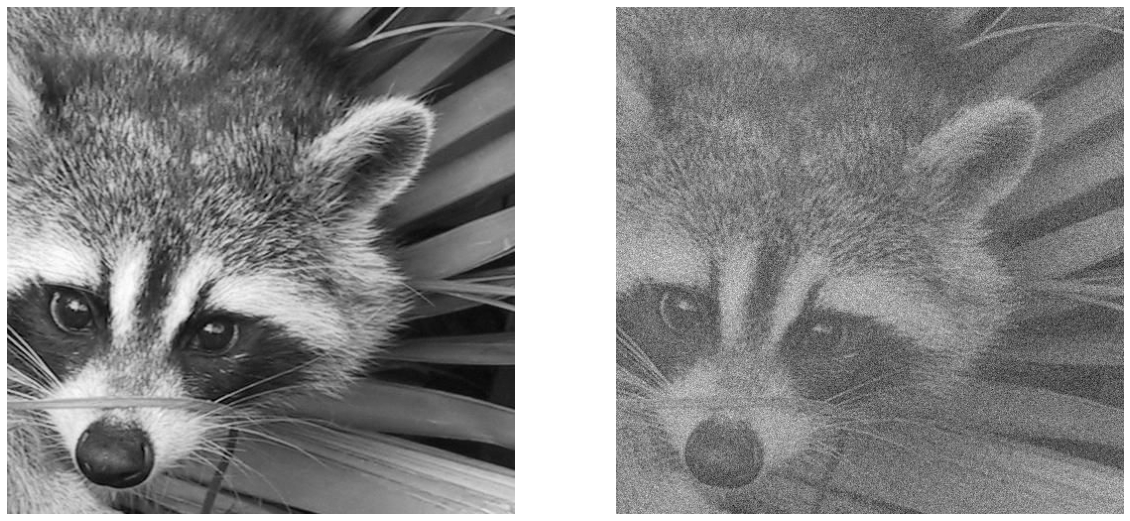

In [2]:
# We will load a test image (from scipy misc test image in grayscale)  
r_img = sp.misc.face(gray=True)
print(r_img.shape)

# The imread command can be used to load an image
#IM = imread('path to image')

# crop out a square on top right (racoon face)
R = r_img[:512, -512:]  
print(R.shape)
print(R.dtype)
R = np.copy(R).astype(float)
print(R.dtype)

nx = R.shape[0]
ny = R.shape[1]

NR = np.copy(R).astype(float)
# add noise 
NR += R.std() * 0.95 * np.random.standard_normal(R.shape)

fig,axs = plt.subplots(1,2,figsize=(20,20))

axs[0].imshow(R,cmap='gray')
axs[0].axis('off')

axs[1].imshow(NR,cmap='gray')
axs[1].axis('off')


(-0.5, 511.5, 511.5, -0.5)

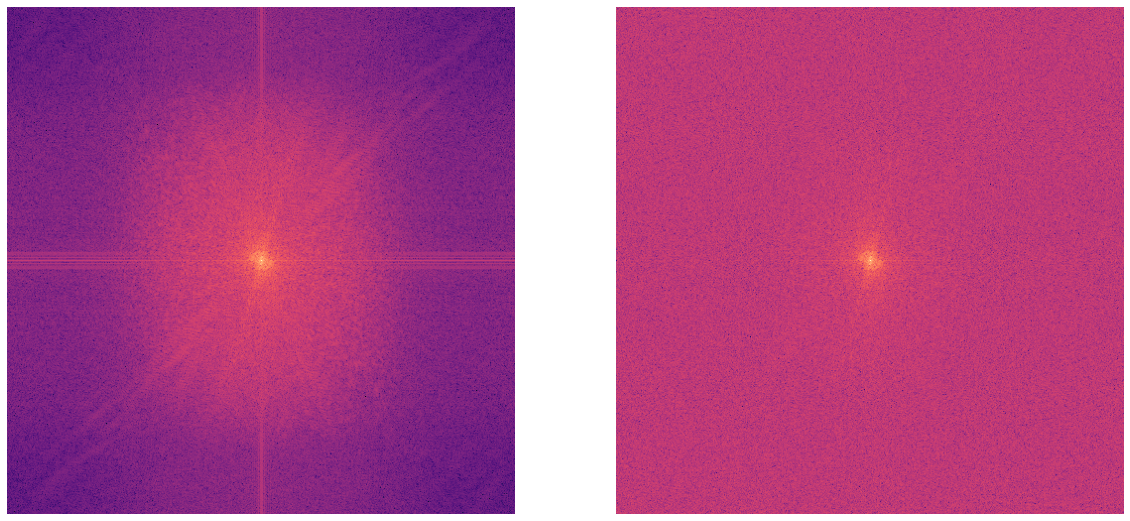

In [3]:
Rhat = np.fft.fft2(R)
Rhat = np.fft.fftshift(Rhat) # we still need to shift the fft in 2D 

NRhat = np.fft.fft2(NR)
NRhat = np.fft.fftshift(NRhat) # we still need to shift the fft in 2D


F = np.log(np.abs(Rhat))
FN = np.log(np.abs(NRhat))

k_gridx = np.linspace(-nx/2, nx/2, nx)
k_gridy = np.linspace(-ny/2, ny/2, ny)


KX, KY = np.meshgrid(k_gridx, k_gridy)

fig,axs = plt.subplots(1,2,figsize=(20,20))
axs[0].imshow(F,cmap='magma')
axs[0].axis('off')
axs[1].imshow(FN,cmap='magma')
axs[1].axis('off')



In [4]:
def g(x,y, s): # 2D Gaussian filter
  val = np.exp( - ( (x**2 + y**2)/(s**2)  ))

  return val



Text(0, 0.5, 'ky')

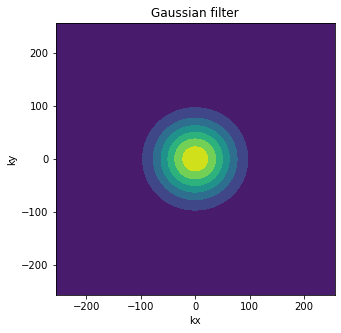

In [5]:
# get filter values in freq domain and plot it
sigma = 70
#sigma = 30
Gfilter = g(KX, KY, sigma)

fig, ax = plt.subplots(figsize=(5,5))

ax.contourf(KX, KY, Gfilter)
ax.set_title('Gaussian filter')
ax.set_xlabel('kx')
ax.set_ylabel('ky')



In [6]:
NRFhat = Gfilter*NRhat
NRF = np.real(np.fft.ifft2( np.fft.ifftshift(NRFhat) ))


In [7]:
# NRFhat =NRhat*0.0001
# NRFhat[210:290,210:290] = NRhat[210:290,210:290]
# NRF = np.real(np.fft.ifft2( np.fft.ifftshift(NRFhat) ))



(-0.5, 511.5, 511.5, -0.5)

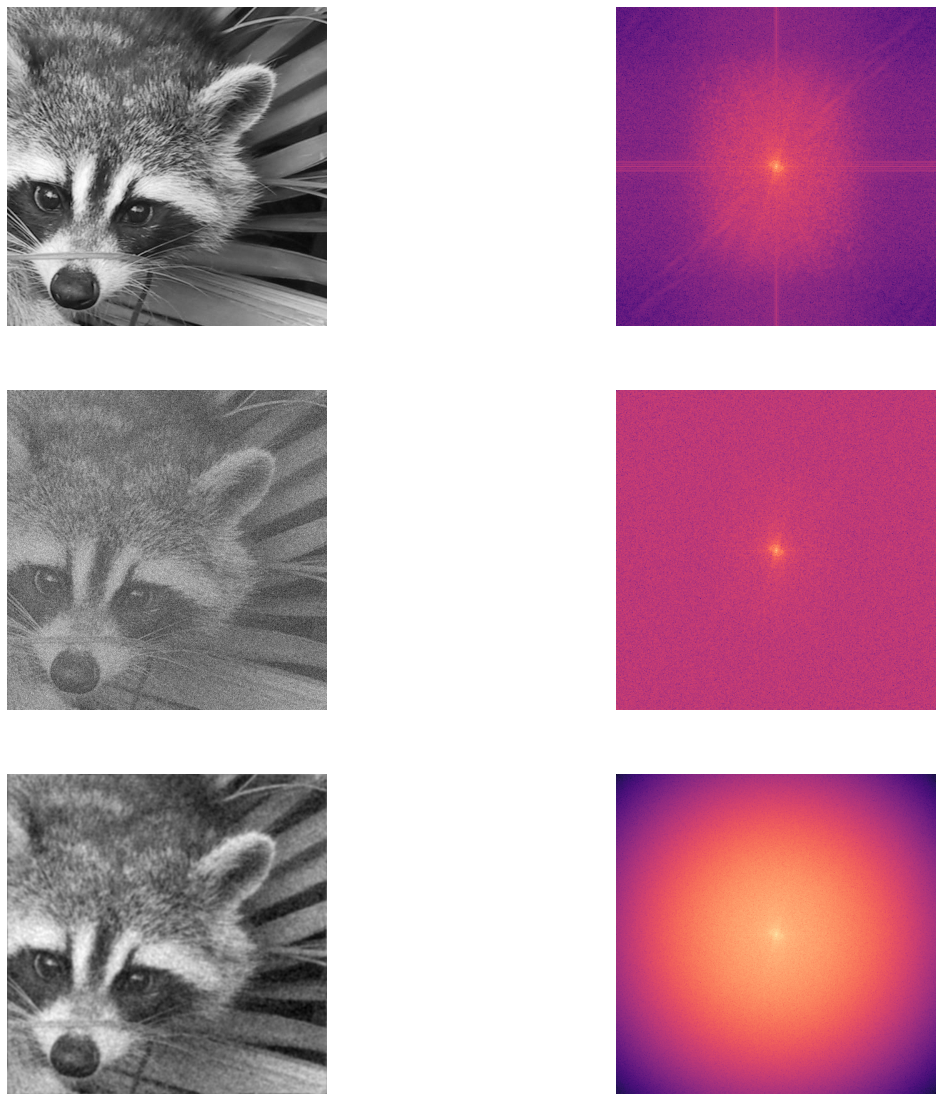

In [8]:

FNF =np.log(np.abs(NRFhat))

fig,axs = plt.subplots(3,2,figsize=(20,20))

axs[0,0].imshow(R,cmap='gray')
axs[0,0].axis('off')

axs[1,0].imshow(NR,cmap='gray')
axs[1,0].axis('off')

axs[2,0].imshow(NRF,cmap='gray')
axs[2,0].axis('off')

axs[0,1].imshow(F,cmap='magma')
axs[0,1].axis('off')

axs[1,1].imshow(FN,cmap='magma')
axs[1,1].axis('off')

axs[2,1].imshow(FNF,cmap='magma')
axs[2,1].axis('off')

